In [15]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# 데이터 불러오기
train = pd.read_csv('./csv/titanic/train.csv')
test = pd.read_csv('./csv/titanic/test.csv')

# 데이터 기본 정보 확인
print(train.info())
print(train.describe())
print(train.head())

# 결측치 확인
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

### 간단한 EDA

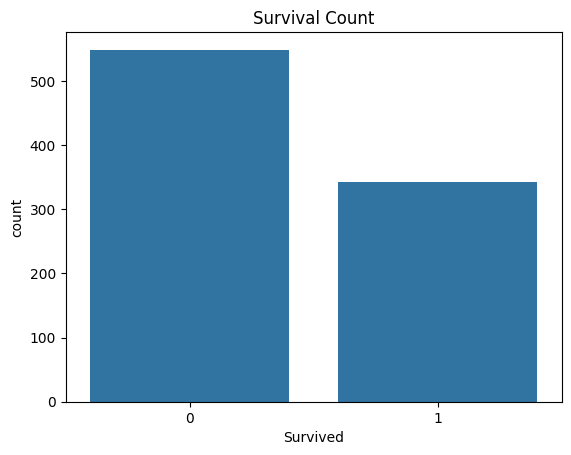

In [18]:
# 생존자 비율 시각화
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()

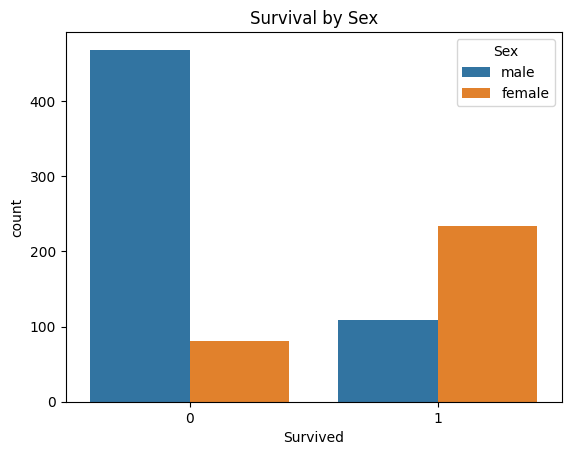

In [19]:
# 성별에 따른 생존율
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')
plt.show()

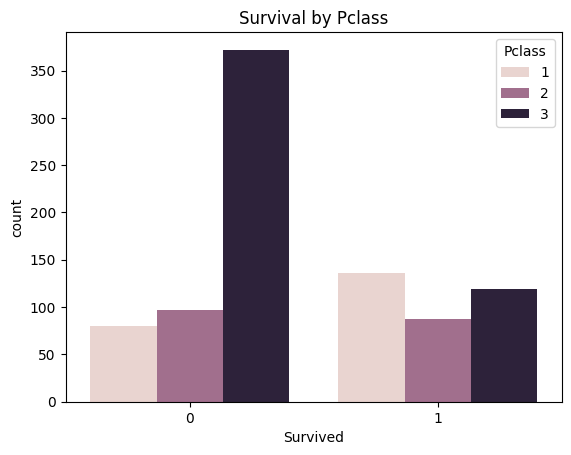

In [20]:
# 객실 등급(Pclass)에 따른 생존율
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Pclass')
plt.show()

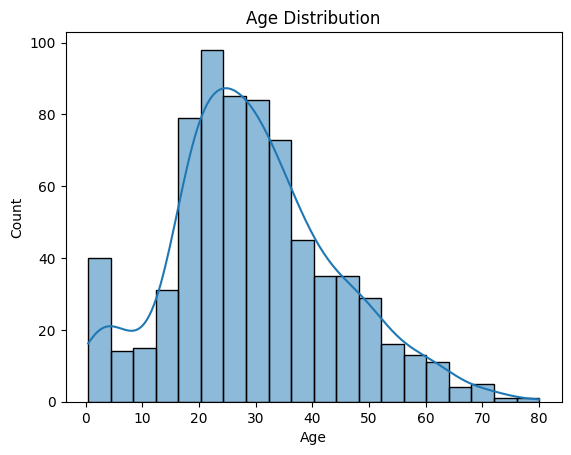

In [21]:
# 나이 분포 시각화
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

### 데이터 전처리

In [22]:
# 'Sex' 컬럼을 숫자로 변환 (male: 0, female: 1)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [35]:
# 결측치 처리
# Age 결측치는 평균으로 채우기
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [36]:
# Embarked 결측치는 최빈값으로 채우기
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [37]:
# Fare 결측치는 평균값으로 채우기 (test 데이터만)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [26]:
# 'Embarked' 컬럼 숫자로 변환
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [27]:
# 사용할 feature 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = train[features]
y = train['Survived']

### 모델 학습

In [28]:
# 학습용/검증용 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# 검증 데이터로 예측
y_pred = model.predict(X_val)

In [31]:
# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8212


### 테스트 데이터 예측

In [32]:
# 테스트 데이터로 예측하기
X_test = test[features]
test_pred = model.predict(X_test)

In [33]:
# 결과 만들기 (제출 파일 형태)
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})

In [34]:
# 결과 저장
submission.to_csv('submission.csv', index=False)